In [30]:
import os
import pathlib

from tqdm.auto import tqdm

In [19]:
from facade_project import FACADE_LABELME_ORIGINAL_DIR, FACADE_IMAGES_DIR, LABEL_NAME_TO_VALUE

In [9]:
img_paths = [os.path.join(FACADE_LABELME_ORIGINAL_DIR, fname) for fname in sorted(os.listdir(FACADE_LABELME_ORIGINAL_DIR))]

len(img_paths)

418

# From Labelme to COCO

In [14]:
from facade_project.coco.from_labelme import Labelme2coco

In [28]:
def create_coco_ann_and_images_dir(json_files, dir_name, name_suffix, selected_classes=LABEL_NAME_TO_VALUE):
    data_dir = '{}/coco/{}'.format(FACADE_IMAGES_DIR, dir_name)
    img_dir = '{}/images/{}'.format(data_dir, name_suffix)
    pathlib.Path(img_dir).mkdir(parents=True, exist_ok=True)
    l2c_obj = Labelme2coco(
        json_files,
        '{}/ann_{}.json'.format(data_dir, name_suffix),
        only_labels=selected_classes,
        save_img_dir=img_dir,
    )
    l2c_obj.save_json()
    return l2c_obj

# Split train - val

In [11]:
from facade_project.data import DEFAULT_TRAIN_IND, DEFAULT_VAL_IND

In [16]:
train_json = [img_paths[i] for i in DEFAULT_TRAIN_IND]
val_json = [img_paths[i] for i in DEFAULT_VAL_IND]

# Generate

## Training

## Validation

# Display
This code is adapted from original code on http://cocodataset.org/

In [35]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import PIL

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [36]:
annotation_path = '{}/coco/original/ann_train.json'.format(FACADE_IMAGES_DIR)
image_dir = '{}/coco/original/images/train'.format(FACADE_IMAGES_DIR)

In [37]:
annotation_path

'/data/images/coco/original/ann_train.json'

In [38]:
coco=COCO(annotation_path)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [39]:
coco.getCatIds()

[1, 2, 3]

In [40]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
wall window door

COCO supercategories: 
facade


In [41]:
img_metadata = coco.loadImgs(102)[0]
image_path = os.path.join(image_dir, img_metadata['file_name'])

I = PIL.Image.open(image_path)

In [42]:
img_metadata

{'height': 4016, 'width': 6016, 'id': 102, 'file_name': 'DSC_4430.jpg'}

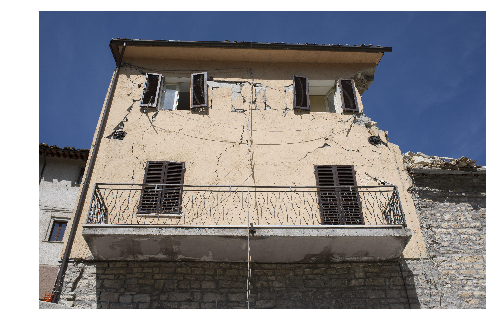

In [43]:
plt.axis('off')
plt.imshow(I)

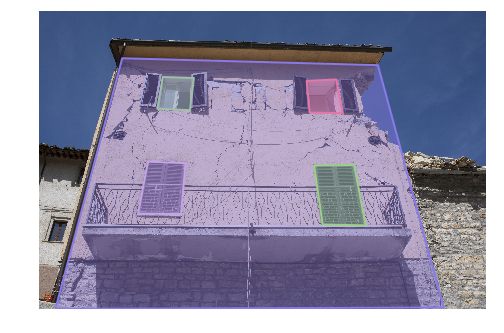

In [44]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
catIds = coco.getCatIds(catNms=[]);
annIds = coco.getAnnIds(imgIds=img_metadata['id'], catIds=catIds)
#print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

## coco format - template for annotations